# Test the random attacker in the little environment

-   initialisation of the environment
-   initialisation of the random agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles)

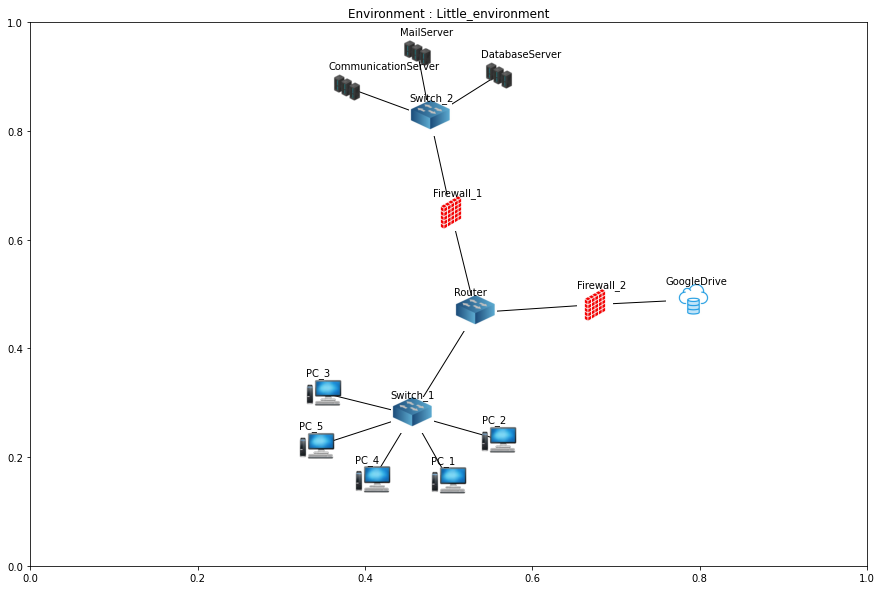

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'System Network Connections Discovery', 1: 'Web Portal Capture', 2: 'Browser Session Hijacking', 3: 'Network Service Scanning', 4: 'Password Guessing'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {'System Network Connections Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_2': {}, 'PC_3': {}, 'PC_4': {}, 'PC_5': {'Web Portal Capture': {'data sources triggered': 'File', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Password Guessing': {'data sou

In [4]:
from cyberbattle.agents.attacker.baseline.random import RandomAgent
from cyberbattle.agents.simulation import Simulation

random_agent = RandomAgent(name='test_random')

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent test_random
with parameters : uniform
against nothing.
Epsilon greedy search parameters : max_iteration=1000, epochs=50 and epsilon=0.9.

Epoch : 1/50, epsilon = 0.9
1000/1000 [==============================] - 0s 17us/iteration - cumulate rewards: 250.0 - sucessfull action: 31 - failed action: 128 - infected machine count: 3              

Total reward : 250.0, epoch ended at 208 iterations.

###################

Epoch : 2/50, epsilon = 0.010000000398014049
1000/1000 [==============================] - 0s 4us/iteration - cumulate rewards: 994.0 - sucessfull action: 12 - failed action: 44 - infected machine count: 3              

Total reward : 994.0, epoch ended at 80 iterations.

###################

Epoch : 3/50, epsilon = 0.010000000000000004
1000/1000 [==============================] - 0s 6us/iteration - cumulate rewards: 568.0 - sucessfull action: 15 - failed action: 89 - infected machine count: 3              

Total reward : 568.0, epoch ended at 158 iteratio

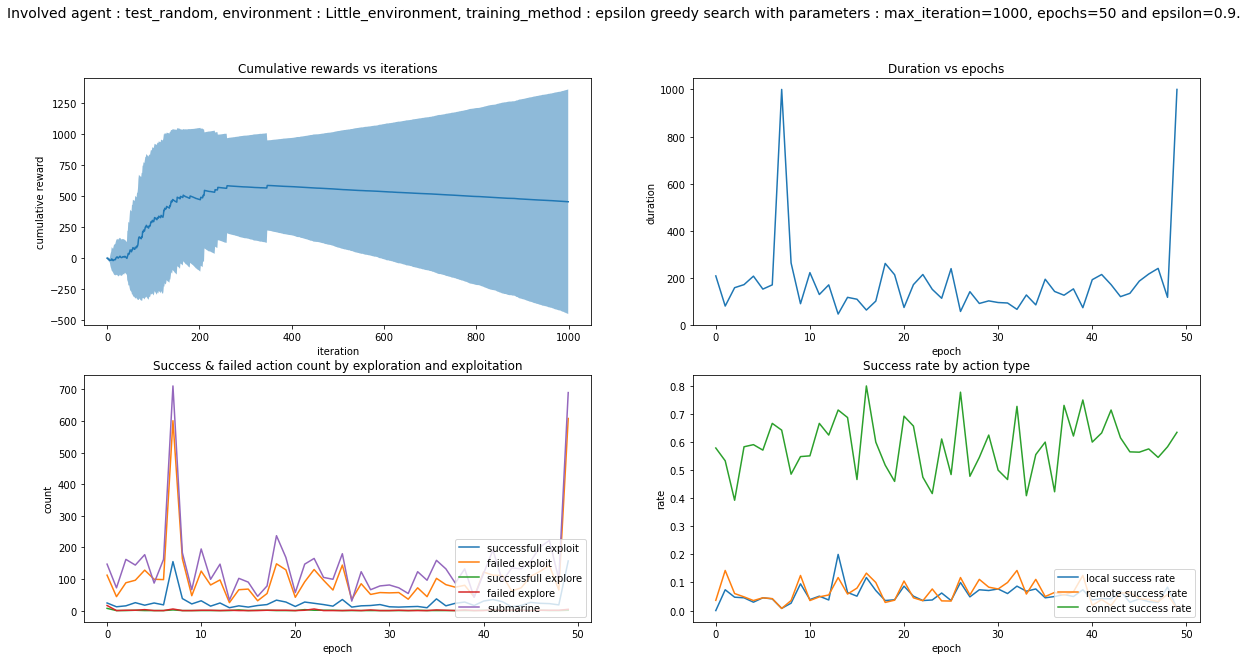

Last attack details :



In [5]:
simulation.run(
    max_iteration=1000,
    epochs=50,
    attacker=random_agent
)